In [30]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [4]:
(x_train, _), (x_test, _) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [51]:
## Model Building
model = Sequential()
model.add(Input(shape=(784,)))
# model.add(Dense(512, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(16, activation="relu")) # Code
model.add(Dense(128, activation="relu"))
# model.add(Dense(512, activation="relu"))
model.add(Dense(784))

In [52]:
model.compile(optimizer="adam", loss="mean_squared_error",
              metrics="mean_squared_error")

model.fit(x=x_train, y=x_train, epochs=50, batch_size=1000,
          validation_data=(x_test, x_test))

Epoch 1/50
60/60 [==============================] - 1s 21ms/step - loss: 4618.6479 - mean_squared_error: 4618.6479 - val_loss: 3790.8596 - val_mean_squared_error: 3790.8596
Epoch 2/50
60/60 [==============================] - 1s 20ms/step - loss: 3175.1011 - mean_squared_error: 3175.1011 - val_loss: 2792.4055 - val_mean_squared_error: 2792.4055
Epoch 3/50
60/60 [==============================] - 1s 20ms/step - loss: 2609.9194 - mean_squared_error: 2609.9194 - val_loss: 2420.3000 - val_mean_squared_error: 2420.3000
Epoch 4/50
60/60 [==============================] - 1s 21ms/step - loss: 2301.3154 - mean_squared_error: 2301.3154 - val_loss: 2165.6338 - val_mean_squared_error: 2165.6338
Epoch 5/50
60/60 [==============================] - 1s 21ms/step - loss: 2117.9104 - mean_squared_error: 2117.9104 - val_loss: 2039.6060 - val_mean_squared_error: 2039.6060
Epoch 6/50
60/60 [==============================] - 1s 21ms/step - loss: 2022.8051 - mean_squared_error: 2022.8051 - val_loss: 1960.743

In [53]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_23 (Dense)             (None, 16)                2064      
_________________________________________________________________
dense_24 (Dense)             (None, 128)               2176      
_________________________________________________________________
dense_25 (Dense)             (None, 784)               101136    
Total params: 205,856
Trainable params: 205,856
Non-trainable params: 0
_________________________________________________________________


In [54]:
for layer in model.layers:
    print(layer)

### Encoder

In [55]:
encoder = Sequential()
for layer in model.layers[:2]:
    encoder.add(layer)

In [56]:
encoder.build(input_shape=(None,784))
encoder.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_23 (Dense)             (None, 16)                2064      
Total params: 102,544
Trainable params: 102,544
Non-trainable params: 0
_________________________________________________________________


### Decoder

In [57]:
decoder = Sequential()
for layer in model.layers[2:]:
    decoder.add(layer)

In [58]:
decoder.build(input_shape = (None, 16))
decoder.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 128)               2176      
_________________________________________________________________
dense_25 (Dense)             (None, 784)               101136    
Total params: 103,312
Trainable params: 103,312
Non-trainable params: 0
_________________________________________________________________


### Test

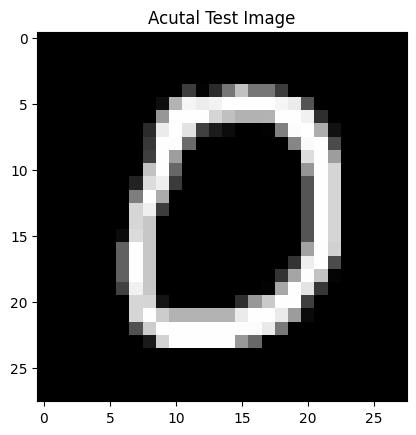

In [69]:
plt.imshow(x_test[10].reshape(28,28), cmap="gray")
plt.title("Acutal Test Image")
plt.show()

In [60]:
code = encoder.predict(x_test)

In [61]:
code[100] # This code of 100th image in test set is a compressed representation of the original image

array([ 379.48615, 1515.0681 ,    0.     ,  826.4027 ,    0.     ,
          0.     , 1421.094  ,    0.     ,  918.2942 ,  278.78723,
        907.3844 ,    0.     , 1123.7948 , 1062.6324 ,    0.     ,
          0.     ], dtype=float32)

In [64]:
# Decode this compressed image

recons_output = decoder.predict(code)

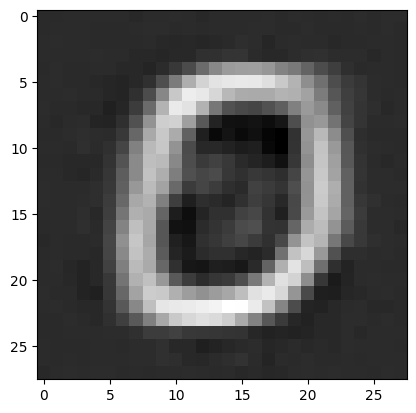

In [68]:
plt.imshow(recons_output[10].reshape(28,28), cmap='gray')
plt.show()

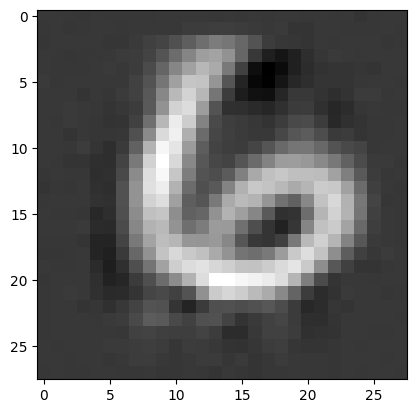

In [66]:
plt.imshow(recons_output[100].reshape(28,28), cmap='gray')
plt.show()

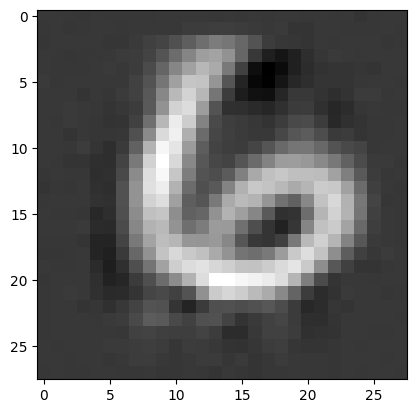

In [67]:
plt.imshow(recons_output[100].reshape(28,28), cmap='gray')
plt.show()